# Trabajo Practico N°2 | Regresión

### Estudiante: Mancuso Augusto Tomás


Luego abrimos el archivo para modificarlo de ser necesario

In [14]:
import pandas as pd

# Cargamos el CSV y lo asignamos a una variable
df = pd.read_csv('insurance.csv')

# Mostramos los primeros 5 registros como ejemplo
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Estadística Descriptiva

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Análisis Exploratorio de Datos

Mapa de calor para ver la correlación entre las variables. Por otro lado eliminamos las variables no numéricas

   age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520


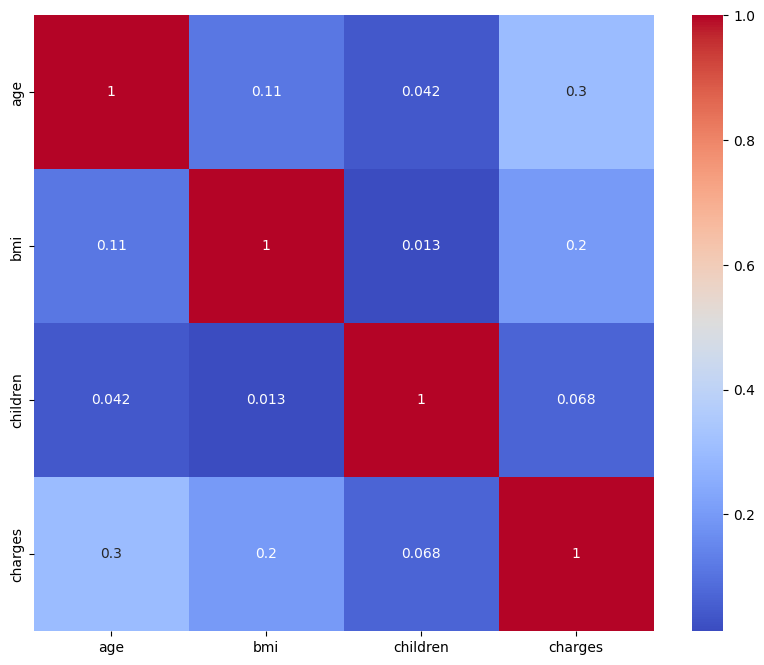

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numerics = df.drop(columns=['sex', 'smoker', 'region'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerics.corr(), annot=True, cmap='coolwarm')
plt.show()


## Modelo de Regresión Lineal

Primero prepararemos los datos, escalar los datos y divídelos en conjuntos de entrenamiento y prueba

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_cleaned = df.select_dtypes(include=['int64', 'float64'])
# Seleccionar variables predictoras (features) y variable objetivo (target)
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Entrenar y evaluar el modelo de regresión lineal

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model_lr.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 131201335.64669806
R^2 Score: 0.15489592484270753


##  Modelo de Regresión con SVR y Decision Tree

In [24]:
# SVR

from sklearn.svm import SVR

# Crear y entrenar el modelo SVR
model_svr = SVR()
model_svr.fit(X_train, y_train)

# Predecir y evaluar
y_pred_svr = model_svr.predict(X_test)
print('Mean Squared Error (SVR):', mean_squared_error(y_test, y_pred_svr))
print('R^2 Score (SVR):', r2_score(y_test, y_pred_svr))


Mean Squared Error (SVR): 166529037.01267877
R^2 Score (SVR): -0.072659566442274


In [25]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

# Crear y entrenar el modelo Decision Tree
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Predecir y evaluar
y_pred_dt = model_dt.predict(X_test)
print('Mean Squared Error (Decision Tree):', mean_squared_error(y_test, y_pred_dt))
print('R^2 Score (Decision Tree):', r2_score(y_test, y_pred_dt))



Mean Squared Error (Decision Tree): 309702375.35055816
R^2 Score (Decision Tree): -0.9948786207439577


## Gráficos para Regresión Lineal

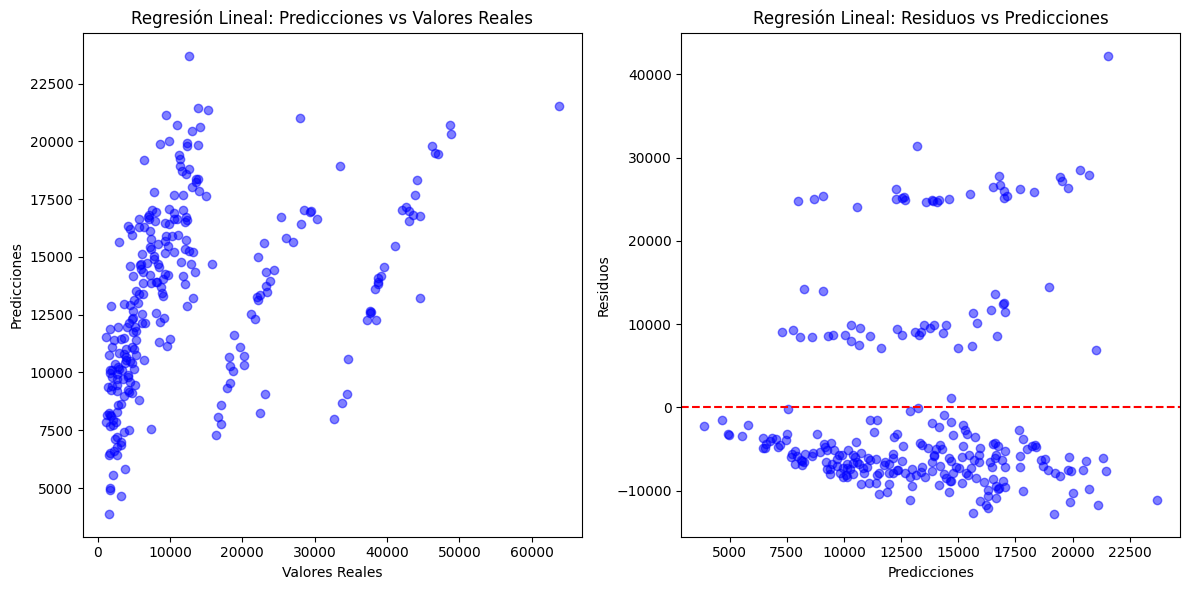

In [26]:
# Gráfico de las predicciones versus los valores reales para Regresión Lineal
plt.figure(figsize=(12, 6))

# Predicciones vs Valores Reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Predicciones vs Valores Reales')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Regresión Lineal: Residuos vs Predicciones')

plt.tight_layout()
plt.show()


## Gráficos para SVR


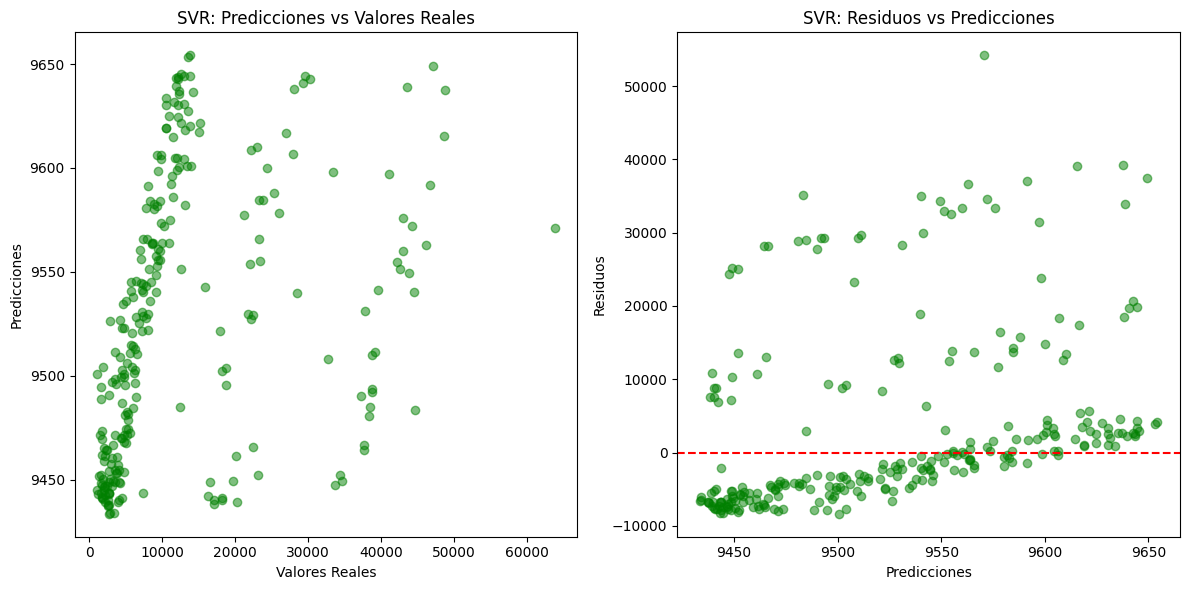

In [27]:
# Gráfico de las predicciones versus los valores reales para SVR
plt.figure(figsize=(12, 6))

# Predicciones vs Valores Reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color='green', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('SVR: Predicciones vs Valores Reales')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals_svr = y_test - y_pred_svr
plt.scatter(y_pred_svr, residuals_svr, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('SVR: Residuos vs Predicciones')

plt.tight_layout()
plt.show()


## Gráficos para Decision Tree

In [ ]:
# Gráfico de las predicciones versus los valores reales para Decision Tree
plt.figure(figsize=(12, 6))

# Predicciones vs Valores Reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Decision Tree: Predicciones vs Valores Reales')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals_dt = y_test - y_pred_dt
plt.scatter(y_pred_dt, residuals_dt, color='orange', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Decision Tree: Residuos vs Predicciones')

plt.tight_layout()
plt.show()
